# File to explore time dependant data and create (preliminary plots)

## Additonal tests, extract times, basic sim data, create scripts

In [1]:
# Extract simulation times for all snapshots
from scipy.io.idl import readsav

path = '/media/joachim/T7 Shield/exwings_archivedata/co5bold_data/dst28gm06n052/'
phases = [
    '032',
    '180',
    '182',
    '184',
    '186',
    '188',
    '190',
    '192',
    '194',
    '196',
    '198',
    '200',
    '202',
    '204',
]
yr = 3600*24*365.25
for phase in phases:
    stardata = readsav(f'{path}st28gm06n052_{phase}.sav')
    stardata = stardata['ful']

    # Time-step time
    print(phase)
    print(f"Current time?: {stardata['Z'][0][0][7]} {stardata['Z'][0][0][8]}")
    print(f"Current time?: {stardata['Z'][0][0][10]} {stardata['Z'][0][0][11]}")
    print(f"               {stardata['Z'][0][0][7]/yr} yrs")
    print(f"               {stardata['Z'][0][0][10]/yr} yrs")
    print()
print('Done')



/tmp/ipykernel_21079/2748285544.py:2: DeprecationWarning: Please use `readsav` from the `scipy.io` namespace, the `scipy.io.idl` namespace is deprecated.
  from scipy.io.idl import readsav
/home/joachim/.local/lib/python3.8/site-packages/scipy/io/_idl.py:465: UserWarning: Using experimental 64-bit array read
  warnings.warn("Using experimental 64-bit array read")


032
Current time?: 155001344.0 b's'
Current time?: 155001339.24389648 b's'
               4.911696199964509 yrs
               4.911696049252684 yrs



KeyboardInterrupt: 

In [1]:
# Create run-files
import create_r3d_functions as c3d


c3d.write_r3d_runscripts(
    path = '../',
    phase_list = [
        199,
        201,
        203,
        205,
        206,
        207,
        208,
        209,
        210,
        211,
        212,
    ],
    sed_angles_list = [
        [0,0],
        [90,0],
        [180,0],
        [270,0],
        [90,90],
        [90,270],
    ],
    image_wavelength_list = [1,10],
    image_angles_list = [
        [0,0],
        [90,0],
        [180,0],
        [270,0],
        [90,90],
        [90,270],
    ],
    image_sizeau = 30,
    image_npix = 512,
    Nscripts = 1
)


Finished writing 11 run-r3d-scripts (dont forget > chmod +x on them)



## Remove spikes in SEDs and images

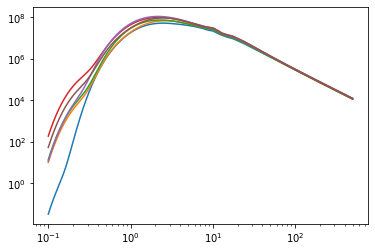

In [1]:
# Remove spikes from SED
# Merge SEDs with different seeds
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import os

folder = '../r3dresults/st28gm06n052_timedep'
#phases = [
#    '180',
#    '182',
#    '184',
#    '186',
#    '188',
#    '192',
#    '194',
#    '196',
#    '198',
#    '200',
#    '202',
#    '204',
#]
phases= ['190']

angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
for phase in phases:
    for angle in angles:
        a,b = a3d.remove_sedspikes(
                paths = [
                            f'{folder}_1/{phase}/spectrum_{angle}.out',
                            f'{folder}_2/{phase}/spectrum_{angle}.out',
                            f'{folder}_3/{phase}/spectrum_{angle}.out',
                        ],
                save=True
            )
        os.system(f'mv ../spectrum.out {folder}_nospikes/{phase}/spectrum_{angle}.out')

        plt.plot(a,b)
        plt.xscale('log')
        plt.yscale('log')



In [2]:
# Remove spikes from Images
import analyze_r3d_functions as a3d
import os

folder = '../r3dresults/st28gm06n052_timedep'
phases = [
    '190',
]
images = [
    'image_i000_phi000_01um.out',
    'image_i000_phi000_10um.out',
    'image_i090_phi000_01um.out',
    'image_i090_phi000_10um.out',
    'image_i090_phi090_01um.out',
    'image_i090_phi090_10um.out',
    'image_i090_phi270_01um.out',
    'image_i090_phi270_10um.out',
    'image_i180_phi000_01um.out',
    'image_i180_phi000_10um.out',
    'image_i270_phi000_01um.out',
    'image_i270_phi000_10um.out'
]
for phase in phases:
    print(f'Doing phase {phase}')
    for image in images:

        image1d = a3d.remove_imagespikes(
            folders = [
                f'{folder}_1/{phase}/',
                f'{folder}_2/{phase}/',
            ],
            imagefilename = image
        )
        os.system(f'mv ../{image} {folder}_nospikes/{phase}/')


Doing phase 190


## Plot Images

FileNotFoundError: [Errno 2] No such file or directory: '../r3dplots/2024-08-15/180_image_i000_phi000_10um.png'

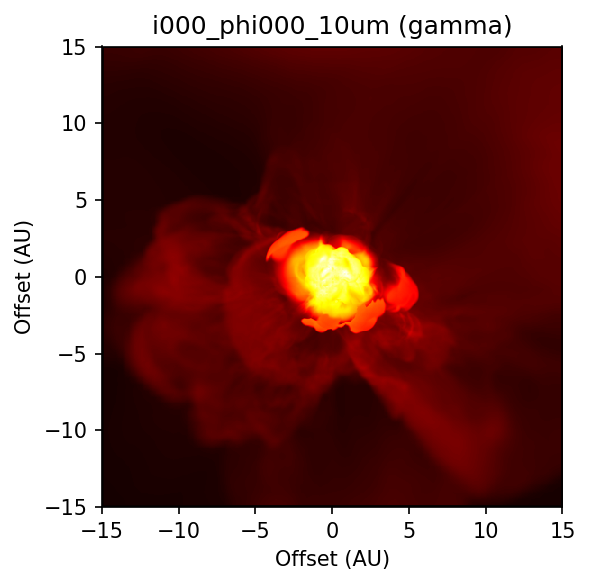

In [23]:
# plot time-series images in each direction
# one for each dicrection
# TODO


import os
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from datetime import date


path = '../r3dresults/st28gm06n052_timedep_nospikes/'
imagefilename = 'image_i000_phi000_10um.out'

# Create outputfolder
outputfolder = '../r3dplots/'+str(date.today())+'/'
if os.path.exists(outputfolder) == False:
    os.system(f'mkdir {outputfolder}')

# Extract list of folders from the path folder, and make them to numbers, and sort them!
snapshot_folders = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
snapshot_folders.sort()

# Load one image at a time and save as png's for animationcreations
for snapshot in snapshot_folders:


    # Create plot objects with image
    fig, ax, fluxtotal = a3d.plot_images(
        path = f'{path}/{snapshot}/',
        images = [imagefilename]
    )

    # Save as PNG's
    fig.savefig(f'{outputfolder}{snapshot}_{imagefilename[:-4]}.png', facecolor='white')







## Plot SEDs

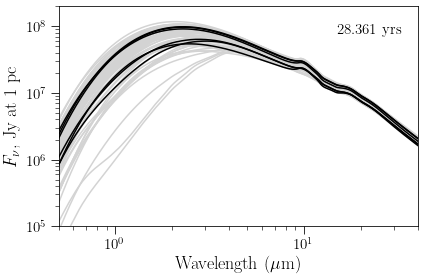

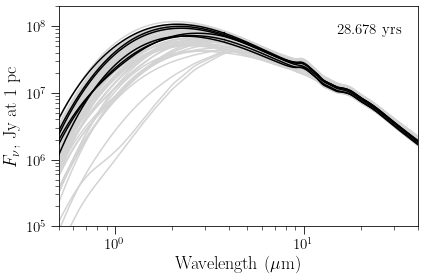

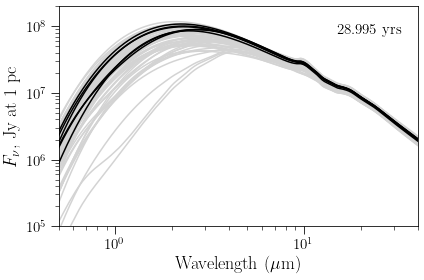

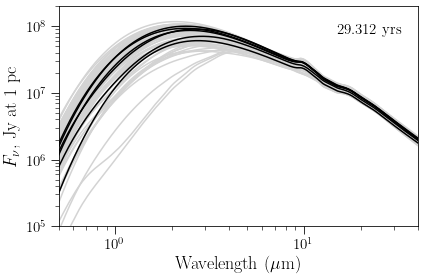

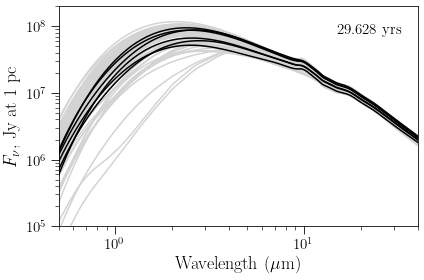

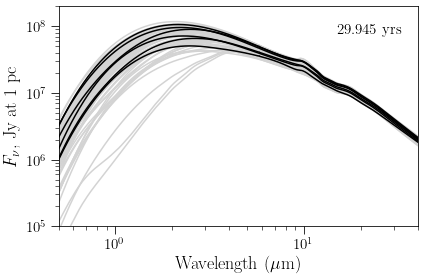

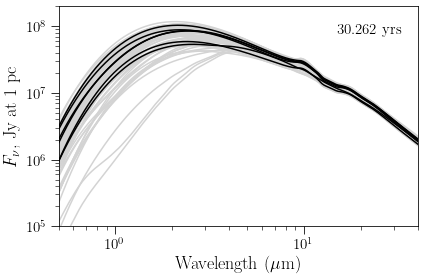

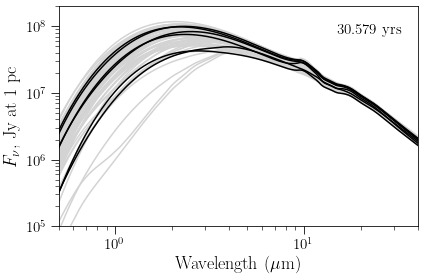

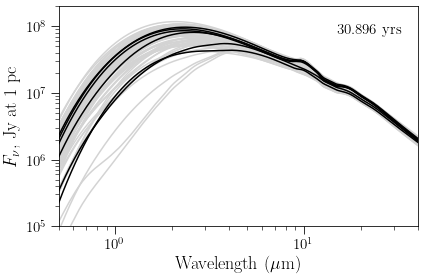

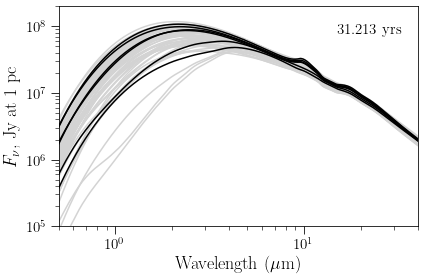

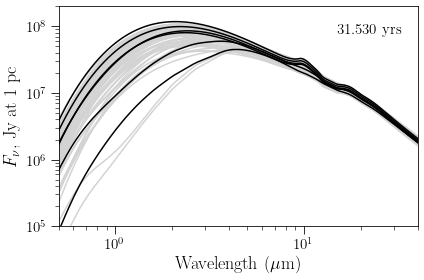

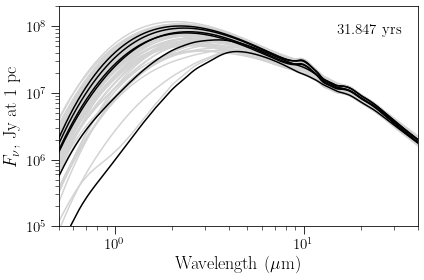

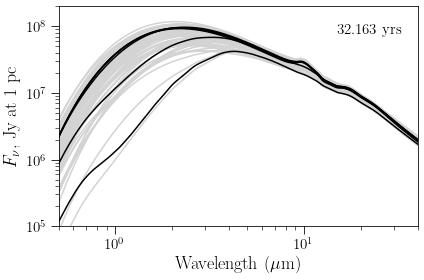

In [4]:
# For talks
# Plot all SEDs in the same figure, highlight one snapshot
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from matplotlib import rc

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

folder = '../r3dresults/st28gm06n052_timedep_nospikes/'
phases = [
    '180',
    '182',
    '184',
    '186',
    '188',
    '190',
    '192',
    '194',
    '196',
    '198',
    '200',
    '202',
    '204',
]
phasetimes = [
    28.361,
    28.678,
    28.995,
    29.312,
    29.628,
    29.945,
    30.262,
    30.579,
    30.896,
    31.213,
    31.530,
    31.847,
    32.163,
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Loop over high lighted snapshots
for nsnap,hilitsnapshot in enumerate(phases):

    # Set settings for each highlighted snapshotplot
    fig, ax = plt.figure(
        hilitsnapshot, 
        figsize=(6, 4)
    ), plt.axes()
    ax.set(
        xscale='log',
        yscale='log',
        xlim=[0.5,40],
        ylim=[1e5,2e8]
    )
    ax.set_ylabel(r'$F_\nu$, Jy at 1 pc', fontsize=18)
    ax.set_xlabel(r'Wavelength ($\mu$m)',fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=15)

    # Load and plot all SEDs
    for phase in phases:
        for angle in angles:
            if phase != hilitsnapshot:
                wavelength, fluxes = a3d.load_spectrum(
                    path=f'{folder}{phase}/spectrum_{angle}.out'
                )
                ax.plot(wavelength,fluxes,'lightgrey')            

    # Load and plot hilite-snapshot
    for angle in angles:
        wavelength, fluxes = a3d.load_spectrum(
            path=f'{folder}{hilitsnapshot}/spectrum_{angle}.out'
        )
        ax.plot(wavelength,fluxes,'k')
    # Add textbox with snapshot numer
    ax.text(
        x=15,y=8e7,
        s=f'{phasetimes[nsnap]:.3f} yrs',
        backgroundcolor='white',
        fontsize=15
    )
    # Save each in a separate file, for talks and suchs
    fig.tight_layout()
    fig.savefig(
        f'figs/seds_snapshot_{hilitsnapshot}.pdf', 
        dpi=300, 
        facecolor='white'
    )




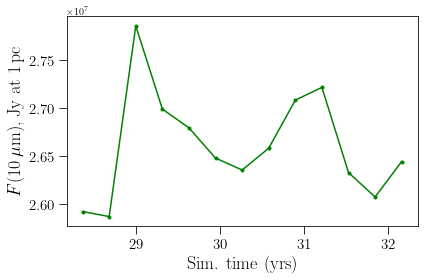

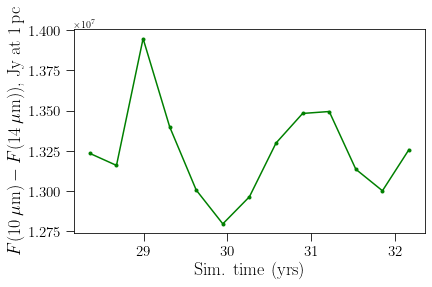

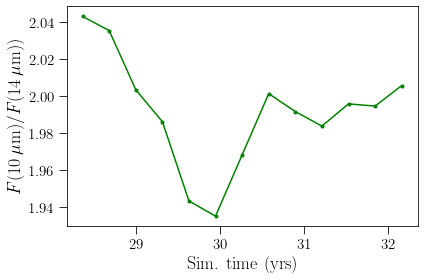

In [1]:
# For talks
# Load F10 and F14 data of all SEDs and plot
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

folder = '../r3dresults/st28gm06n052_timedep_nospikes/'
phases = [
    '180',
    '182',
    '184',
    '186',
    '188',
    '190',
    '192',
    '194',
    '196',
    '198',
    '200',
    '202',
    '204',
]
phasetimes = [
    28.361,
    28.678,
    28.995,
    29.312,
    29.628,
    29.945,
    30.262,
    30.579,
    30.896,
    31.213,
    31.530,
    31.847,
    32.163,
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
Ften = np.zeros(len(phases))
Ffourteen = np.zeros(len(phases))

# Loop over snapshots and angles
for nphase,phase in enumerate(phases):
    Ften_sum = 0
    Ffourteen_sum = 0

    for angle in angles:
        # Load all SEDs
        wavelength, fluxes = a3d.load_spectrum(
            path=f'{folder}{phase}/spectrum_{angle}.out'
        )
        
        # Extract index of 10 and 14 um
        tenmicron = np.argwhere(np.array(wavelength) >= 10)[0][0]-1
        fourteenmicron = np.argwhere(np.array(wavelength) >= 14)[0][0]

        # Save average flux densities of 10 and 14 um
        Ften_sum += fluxes[tenmicron]
        Ffourteen_sum += fluxes[fourteenmicron]
    
    # Take LOS averaged fluxes
    Ften[nphase] = Ften_sum/len(angles)
    Ffourteen[nphase] = Ffourteen_sum/len(angles)

# Plot
# F10 only
fig, ax = plt.figure(num=1, figsize=(6, 4)), plt.axes()
ax.plot(phasetimes,Ften,'g-')
ax.plot(phasetimes,Ften,'g.')
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'$F(10\,\mu$m$)$, Jy at 1\,pc',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()
fig.savefig(
    'figs/timedep_F10.pdf',
    dpi=300,
    facecolor='white'
)

# F10 minus F14
fig, ax = plt.figure(num=2, figsize=(6, 4)), plt.axes()
ax.plot(phasetimes,Ften-Ffourteen,'g-')
ax.plot(phasetimes,Ften-Ffourteen,'g.')
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'$F(10\,\mu$m$) - F(14\,\mu$m$))$, Jy at 1\,pc',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()
fig.savefig(
    'figs/timedep_F10minusF14.pdf',
    dpi=300,
    facecolor='white'
)
# F10 divided F14
fig, ax = plt.figure(num=3, figsize=(6, 4)), plt.axes()
ax.plot(phasetimes,Ften/Ffourteen,'g-')
ax.plot(phasetimes,Ften/Ffourteen,'g.')
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'$F(10\,\mu$m$) / F(14\,\mu$m$))$',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()
fig.savefig(
    'figs/timedep_F10divideF14.pdf',
    dpi=300,
    facecolor='white'
)


## Plot various time-dep-plots

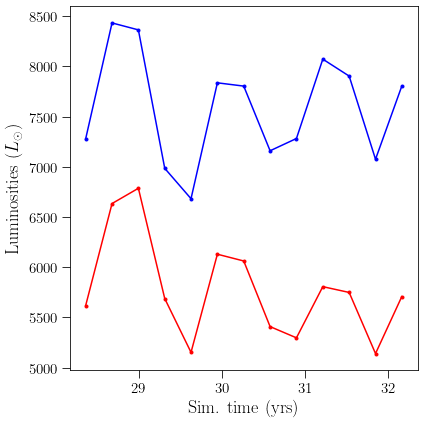

In [27]:
# Plot time-dependent plots (for talk)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

folder = '../r3dresults/st28gm06n052_timedep_nospikes/'
phases = [
    '180',
    '182',
    '184',
    '186',
    '188',
    '190',
    '192',
    '194',
    '196',
    '198',
    '200',
    '202',
    '204',
]
phasetimes = [
    28.361,
    28.678,
    28.995,
    29.312,
    29.628,
    29.945,
    30.262,
    30.579,
    30.896,
    31.213,
    31.530,
    31.847,
    32.163,
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]

# 1. Plot Stellar luminosity
lum_star = [
    7278.866374233659,
    8432.691933359774,
    8363.449845262565,
    6984.454481503716,
    6682.13894514029,
    7836.183237628976,
    7803.57810163866,
    7159.437805890402,
    7281.588116788744,
    8071.944943911453,
    7903.35925582632,
    7074.9928390104515,
    7803.184226469957,
]
fig, ax = plt.figure(num=1, figsize=(6, 6)), plt.axes()
ax.plot(phasetimes,lum_star,'b-')
ax.plot(phasetimes,lum_star,'b.')
# 2. Plot dust+star luminosity
lum_stardust = [
    5617.871194359986,
    6633.722918058202,
    6785.920562651619,
    5687.3909685335,
    5151.778144169866,
    6129.110849259379,
    6061.731901585908,
    5408.1797066572335,
    5296.339394344028,
    5806.050427533794,
    5748.371539886178,
    5139.452976051304,
    5707.024558504942,
]
ax.plot(phasetimes,lum_stardust,'r-')
ax.plot(phasetimes,lum_stardust,'r.')

# Set settings
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'Luminosities ($L_\odot$)',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()
fig.savefig(
    'figs/timedep_stardustlum.pdf',
    dpi=300,
    facecolor='white'
)


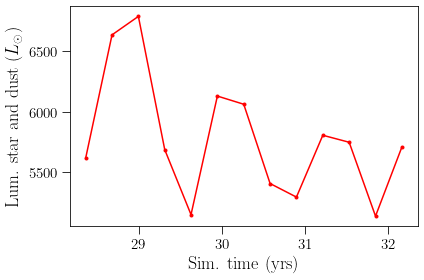

In [5]:
# 2. Plot dust+star luminosity
lum_stardust = [
    5617.871194359986,
    6633.722918058202,
    6785.920562651619,
    5687.3909685335,
    5151.778144169866,
    6129.110849259379,
    6061.731901585908,
    5408.1797066572335,
    5296.339394344028,
    5806.050427533794,
    5748.371539886178,
    5139.452976051304,
    5707.024558504942,
]
fig, ax = plt.figure(num=2, figsize=(6, 4)), plt.axes()
ax.plot(phasetimes,lum_stardust,'r-')
ax.plot(phasetimes,lum_stardust,'r.')
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'Lum. star and dust ($L_\odot$)',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()
fig.savefig(
    'figs/timedep_stardustlum.pdf',
    dpi=300,
    facecolor='white'
)


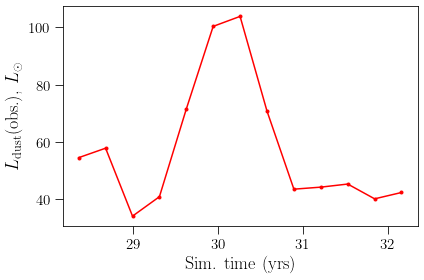

In [1]:
# Plot L(t) of tail of Fduststar - BBfit, only positive data!
# BB is normalised to the peak of the SED (temperature and flux density)
# The luminosity is taken of everything with lambda > peak of the SED!
# Measure the total flux density of those lines 
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

Lsol = 3.828e26 # Watt

folder = '../r3dresults/st28gm06n052_timedep_nospikes/'
phases = [
    '180',
    '182',
    '184',
    '186',
    '188',
    '190',
    '192',
    '194',
    '196',
    '198',
    '200',
    '202',
    '204',
]
phasetimes = [
    28.361,
    28.678,
    28.995,
    29.312,
    29.628,
    29.945,
    30.262,
    30.579,
    30.896,
    31.213,
    31.530,
    31.847,
    32.163,
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
L_Si = np.zeros(len(phases))


# Loop over snapshots and angles
for nphase,phase in enumerate(phases):

    # Reset Si emission summation
    Lum_Si_sum = 0

    for nangle,angle in enumerate(angles):
        # Load all SEDs
        wavelength, fluxes = a3d.load_spectrum(
            path=f'{folder}{phase}/spectrum_{angle}.out'
        )
        # Fit a black body to SED peak
        N_maxflux = np.argmax(fluxes)
        BBfit = a3d.compute_blackbody_freq(
            peak_flux = np.max(fluxes),
            peak_wavelength = wavelength[N_maxflux],
            wavelengths = wavelength
        )
        # Subtract BB from SEDs and save sum of (positive)
        # flux densities after the SED peak.
        dust_emission = fluxes - BBfit

        # Extract dusty SED (with only positive fluxes)
        F_Si_sed = []
        for nwave,flux in enumerate(dust_emission[N_maxflux:]):
            if flux >= 0:
                F_Si_sed.append(flux)
            else:
                F_Si_sed.append(0.0)

        # And sum together lum(Lsol) of each SED
        # Extract dusty SED (with only positive fluxes)
        Lum_Si_sum += a3d.compute_luminosity(
            wavelengths = wavelength[N_maxflux:],
            spectrum = F_Si_sed
        )/Lsol
    # Take the LOS average of this
    L_Si[nphase] = Lum_Si_sum/6


# Plot and save
fig, ax = plt.figure(num=1, figsize=(6, 4)), plt.axes()
ax.plot(phasetimes,L_Si,'r-')
ax.plot(phasetimes,L_Si,'r.')
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'$L_{\rm dust}$(obs.), $L_\odot$',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()
fig.savefig(
    'figs/timedep_dustlum_observed.pdf',
    dpi=300,
    facecolor='white'
)

In [ ]:
# Plot L(t) of tail of Fduststar - Fstar-tail
# with Fstar-tail normalised to the Fduststar-flux densities at peak of Fduststar
# Another way to measure the total flux of the dust emission
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

Lsol = 3.828e26 # Watt

folderdust = '../r3dresults/st28gm06n052_timedep_nospikes/'
folderstar = '../r3dresults/st28gm06n052_timedep_nodust/'
phases = [
    '180',
    '182',
    '184',
    '186',
    '188',
    '190',
    '192',
    '194',
    '196',
    '198',
    '200',
    '202',
    '204',
]
phasetimes = [
    28.361,
    28.678,
    28.995,
    29.312,
    29.628,
    29.945,
    30.262,
    30.579,
    30.896,
    31.213,
    31.530,
    31.847,
    32.163,
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
L_Si = np.zeros(len(phases))

# TODO HÄR ÄR JAG
# Plotta SEDerna jag testkör med först och sen residualen


# Loop over snapshots and angles
for nphase,phase in enumerate(phases):

    # Reset Si emission summation
    Lum_Si_sum = 0

    for nangle,angle in enumerate(angles):
        # Load all SEDs
        wavelength, fluxes = a3d.load_spectrum(
            path=f'{folder}{phase}/spectrum_{angle}.out'
        )
        # Fit a black body to SED peak
        N_maxflux = np.argmax(fluxes)
        BBfit = a3d.compute_blackbody_freq(
            peak_flux = np.max(fluxes),
            peak_wavelength = wavelength[N_maxflux],
            wavelengths = wavelength
        )
        # Subtract BB from SEDs and save sum of (positive)
        # flux densities after the SED peak.
        dust_emission = fluxes - BBfit

        # Extract dusty SED (with only positive fluxes)
        F_Si_sed = []
        for nwave,flux in enumerate(dust_emission[N_maxflux:]):
            if flux >= 0:
                F_Si_sed.append(flux)
            else:
                F_Si_sed.append(0.0)

        # And sum together lum(Lsol) of each SED
        Lum_Si_sum += a3d.compute_luminosity(
            wavelengths = wavelength[N_maxflux:],
            spectrum = F_Si_sed
        )/Lsol
    # Extract dusty SED (with only positive fluxes)
    L_Si[nphase] = Lum_Si_sum/6


# Plot and save
fig, ax = plt.figure(num=1, figsize=(6, 4)), plt.axes()
ax.plot(phasetimes,L_Si,'r-')
ax.plot(phasetimes,L_Si,'r.')
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'$L_{\rm dust}$(obs.), $L_\odot$',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()
fig.savefig(
    'figs/timedep_dustlum_observed.pdf',
    dpi=300,
    facecolor='white'
)

